In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [2]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

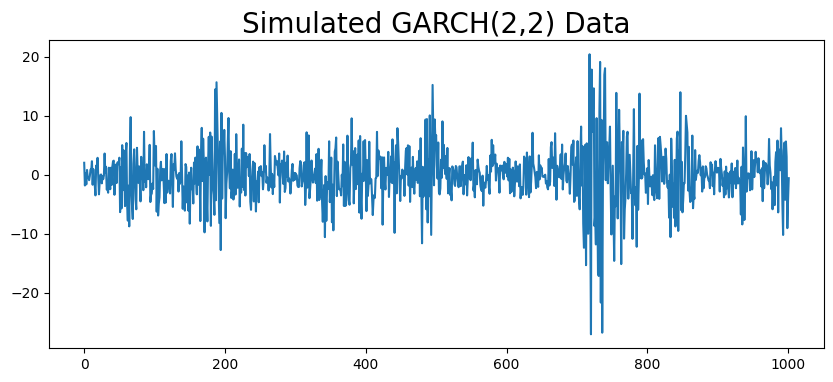

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

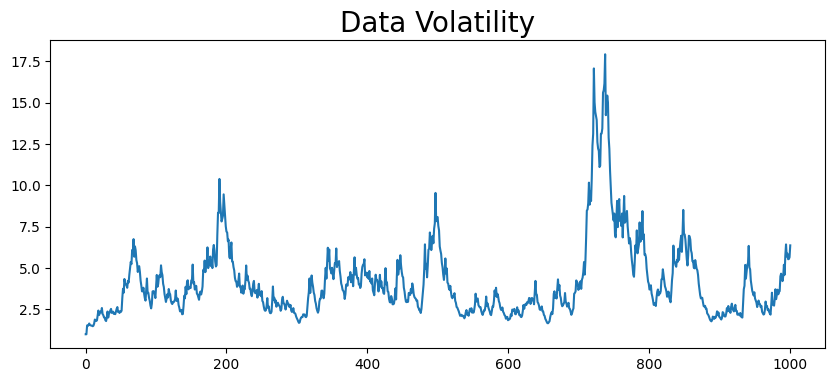

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

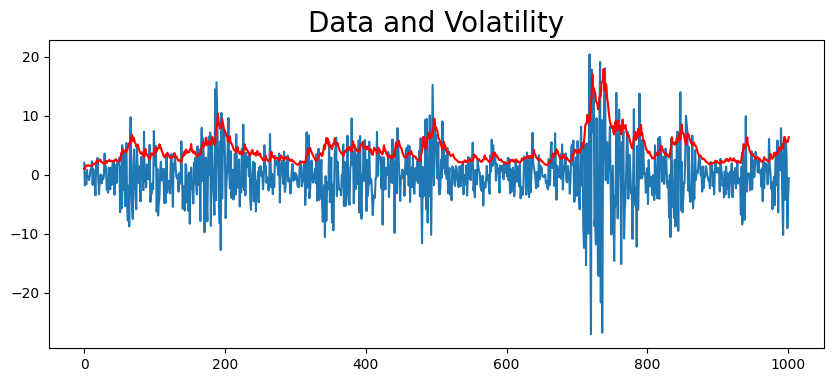

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

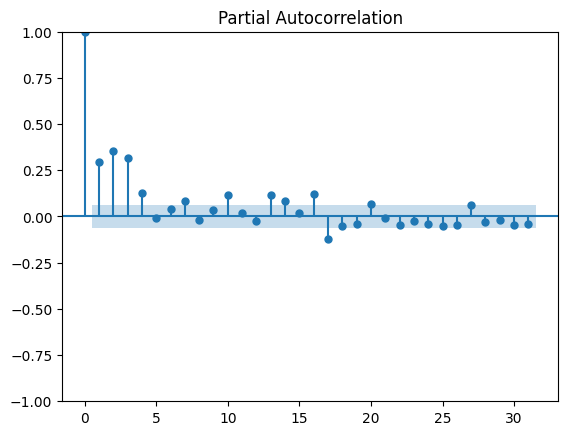

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [7]:
train, test = series[:-test_size], series[-test_size:]

In [8]:
model = arch_model(train, p=2, q=2)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 84974.44913113659
Iteration:      2,   Func. Count:     16,   Neg. LLF: 64869.82849473968
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2621.8554937559
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2481.6528867930465
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2477.951757292524
Iteration:      6,   Func. Count:     49,   Neg. LLF: 3551.4098087889274
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2472.8894585258063
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2450.7505306925314
Iteration:      9,   Func. Count:     72,   Neg. LLF: 2450.5876190842273
Iteration:     10,   Func. Count:     79,   Neg. LLF: 2453.388459651892
Iteration:     11,   Func. Count:     87,   Neg. LLF: 2480.084703500401
Iteration:     12,   Func. Count:     95,   Neg. LLF: 2450.322421553067
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2450.297317315287
Iteration:     14,   Func. Count:    109,   Neg. LLF: 2450.29

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2450.30
Distribution:                  Normal   AIC:                           4912.59
Method:            Maximum Likelihood   BIC:                           4941.42
                                        No. Observations:                  902
Date:                Thu, Sep 11 2025   Df Residuals:                      901
Time:                        21:53:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0364  9.724e-02     -0.375      0.708 [ -0.227,  0.154]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.5805      0.194      2.993  2.758e-03      [  0.200,  0.961]
alpha[1]   2.0554e-03  3.498e-02  5.876e-02      0.953 [-6.651e-02,7.062e-02]
alpha[2]       0.2952  4.834e-02      6.108  1.009e-09      [  0.201,  0.390]
beta[1]        0.4226      0.160      2.645  8.164e-03      [  0.109,  0.736]
beta[2]        0.2634      0.131      2.011  4.432e-02    [6.691e-03,  0.520]
=============================================================================

Covariance estimator: robust
"""

# Predict

In [11]:
predictions = model_fit.forecast(horizon=test_size)

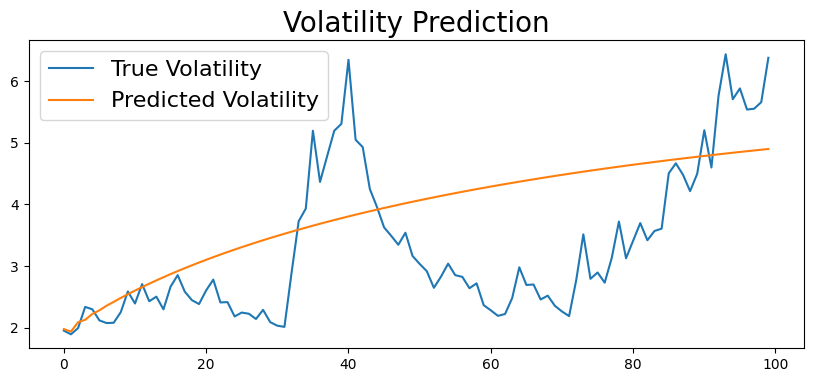

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

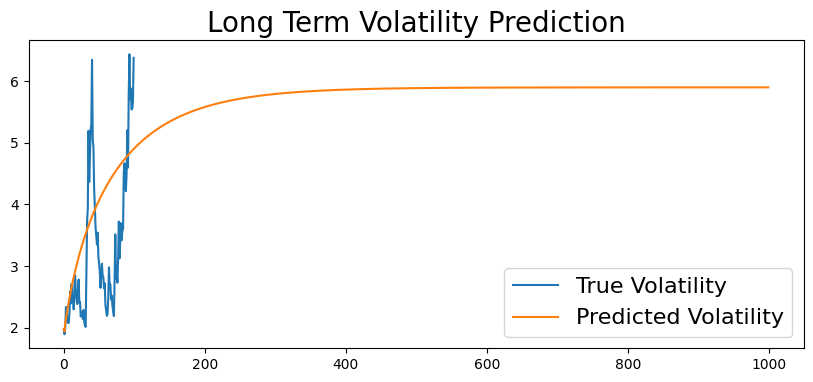

In [13]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [14]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

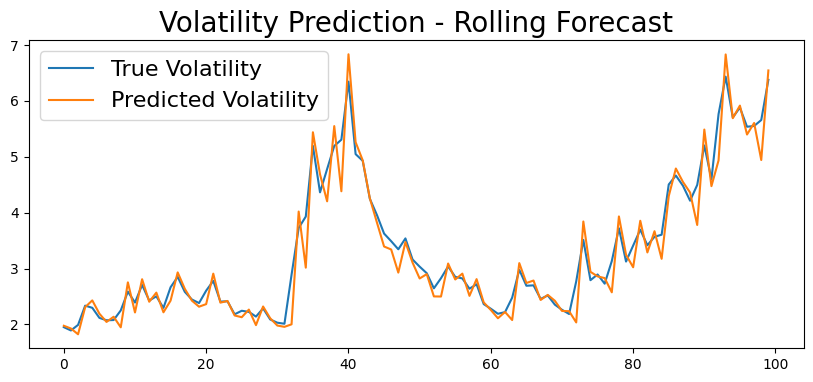

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)